In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
X = tf.range(-50, 50)
y = X + 10
X, y

(<tf.Tensor: shape=(100,), dtype=int32, numpy=
 array([-50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38,
        -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25,
        -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12,
        -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,
          2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
         15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
         41,  42,  43,  44,  45,  46,  47,  48,  49])>,
 <tf.Tensor: shape=(100,), dtype=int32, numpy=
 array([-40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28,
        -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15,
        -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,
         -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
         12,  13,  14,  15,  16,  17,  18,  19,

In [3]:
X_train = X[:80]
X_test = X[80:]
y_train = y[:80]
y_test = y[80:]
print(f'X_train:{X_train.shape}')
print(f'X_test:{X_test.shape}')
print(f'y_train:{y_train.shape}')
print(f'y_test:{y_test.shape}')

X_train:(80,)
X_test:(20,)
y_train:(80,)
y_test:(20,)


In [4]:
#create our model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1]),
    tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mse, 
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
             metrics=['mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               200       
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
from tensorflow.keras.utils import plot_model
plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [6]:
history = model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
3/3 [==============================] - 1s 5ms/step - loss: 415.8689 - mse: 415.8689
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 88.4043 - mse: 88.4043
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 146.2120 - mse: 146.2120
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 115.3790 - mse: 115.3790
Epoch 5/100
3/3 [==============================] - 0s 2ms/step - loss: 66.3797 - mse: 66.3797
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 68.1550 - mse: 68.1550
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 72.9252 - mse: 72.9252
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 55.6031 - mse: 55.6031
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 44.6786 - mse: 44.6786
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 45.3167 - mse: 45.3167
Epoch 11/100
3/3 [==============================] - 0

In [7]:
y_pred = model.predict(X_test)
mse = tf.keras.losses.mse(y_test, tf.squeeze(y_pred))
mse, model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 253ms/step - loss: 1.1059e-10 - mse: 1.1059e-10


(<tf.Tensor: shape=(), dtype=float32, numpy=1.193257e-10>,
 [1.1059455434780929e-10, 1.1059455434780929e-10])

In [8]:
y_test, y_pred

(<tf.Tensor: shape=(20,), dtype=int32, numpy=
 array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
        57, 58, 59])>,
 array([[40.00001 ],
        [41.00001 ],
        [42.00001 ],
        [43.00001 ],
        [44.000008],
        [45.00001 ],
        [46.00001 ],
        [47.00001 ],
        [48.000004],
        [49.00001 ],
        [50.00001 ],
        [51.00001 ],
        [52.00001 ],
        [53.00001 ],
        [54.000015],
        [55.00001 ],
        [56.000008],
        [57.00001 ],
        [58.000008],
        [59.00001 ]], dtype=float32))

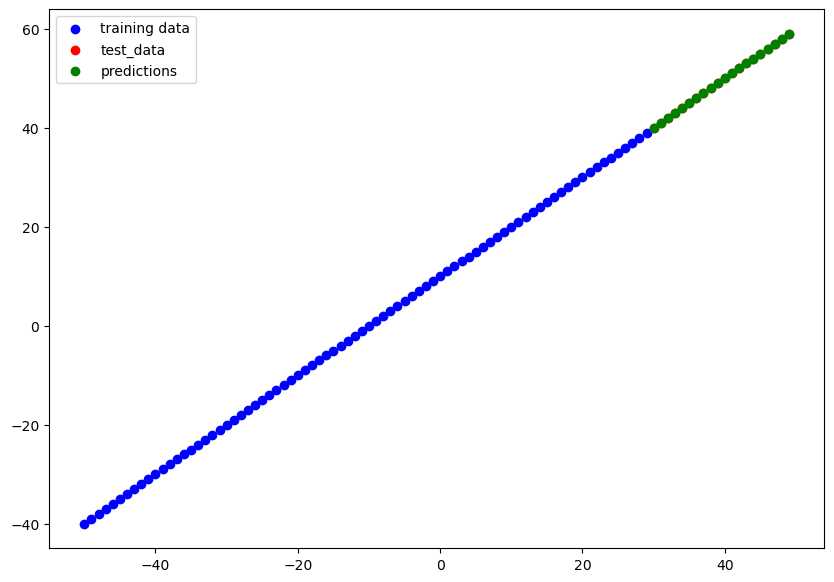

In [9]:
def plot_predictions(X_train, y_train, X_test, y_test, predictions):
    plt.figure(figsize=(10, 7))
    plt.scatter(X_train, y_train, c='b', label="training data")
    plt.scatter(X_test, y_test, c='r', label="test_data")
    plt.scatter(X_test, predictions, c='g', label="predictions")
    plt.legend()
    
plot_predictions(X_train, y_train, X_test, y_test, y_pred)

In [10]:
#make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

In [11]:
mae(y_test, y_pred), mse(y_test, y_pred)

(<tf.Tensor: shape=(), dtype=float32, numpy=1.0681152e-05>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.193257e-10>)

### improve our model

build a mode -> fit it -> evaluate it -> tweak it -> fit it ...

1. get more data
2. make your model larger
3. Train for longer

3 modelling experiments:
 
1. `model1` - same as the oriminal model, 1 layer, trained for 100 epochs
2. `model2` - 2 layers, trained for 100 epochs
2. `model3` - 2 layers, trianed for 500 epochs

In [12]:
X_train, y_train

(<tf.Tensor: shape=(80,), dtype=int32, numpy=
 array([-50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38,
        -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25,
        -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12,
        -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,
          2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
         15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29])>,
 <tf.Tensor: shape=(80,), dtype=int32, numpy=
 array([-40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28,
        -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15,
        -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,
         -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
         12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
         25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
         38

**build model1**

In [13]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.SGD(), 
                          metrics=['mae'])

model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
3/3 [==============================] - 1s 7ms/step - loss: 37.3045 - mae: 37.3045
Epoch 2/100
3/3 [==============================] - 0s 6ms/step - loss: 24.8368 - mae: 24.8368
Epoch 3/100
3/3 [==============================] - 0s 9ms/step - loss: 12.8246 - mae: 12.8246
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 7.7280 - mae: 7.7280
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 8.3208 - mae: 8.3208
Epoch 6/100
3/3 [==============================] - 0s 6ms/step - loss: 7.9151 - mae: 7.9151
Epoch 7/100
3/3 [==============================] - 0s 6ms/step - loss: 8.1677 - mae: 8.1677
Epoch 8/100
3/3 [==============================] - 0s 8ms/step - loss: 8.1033 - mae: 8.1033
Epoch 9/100
3/3 [==============================] - 0s 8ms/step - loss: 7.6541 - mae: 7.6541
Epoch 10/100
3/3 [==============================] - 0s 7ms/step - loss: 7.6414 - mae: 7.6414
Epoch 11/100
3/3 [==============================] - 0s 5ms/step - loss: 7

In [14]:
y_preds_1 = model_1.predict(X_test)

1/1 [==============================] - 0s 84ms/step


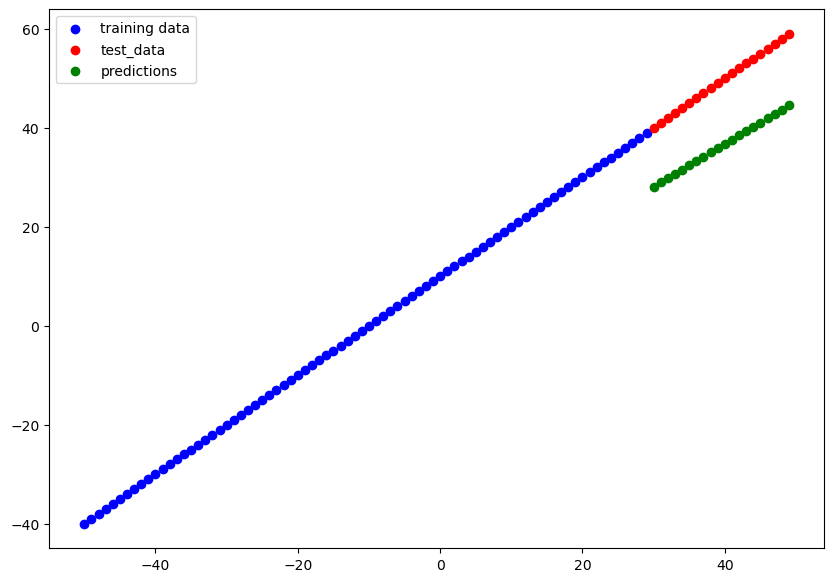

In [15]:
plot_predictions(X_train, y_train, X_test, y_test, y_preds_1)

In [16]:
# calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=13.179532>,
 <tf.Tensor: shape=(), dtype=float32, numpy=174.3179>)

**Build `model_2`**

* 2 dense layers, trained for 100 epochs


In [17]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10), 
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae, 
               optimizer=tf.keras.optimizers.SGD(), 
               metrics=['mse'])

model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
3/3 [==============================] - 1s 7ms/step - loss: 11.7108 - mse: 193.7965
Epoch 2/100
3/3 [==============================] - 0s 8ms/step - loss: 8.7148 - mse: 92.4431
Epoch 3/100
3/3 [==============================] - 0s 6ms/step - loss: 10.9344 - mse: 147.9598
Epoch 4/100
3/3 [==============================] - 0s 8ms/step - loss: 9.4436 - mse: 103.8789
Epoch 5/100
3/3 [==============================] - 0s 7ms/step - loss: 8.6235 - mse: 90.8355
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 9.1888 - mse: 99.9115
Epoch 7/100
3/3 [==============================] - 0s 7ms/step - loss: 9.2828 - mse: 104.2816
Epoch 8/100
3/3 [==============================] - 0s 8ms/step - loss: 10.0854 - mse: 125.9088
Epoch 9/100
3/3 [==============================] - 0s 8ms/step - loss: 8.5910 - mse: 87.0233
Epoch 10/100
3/3 [==============================] - 0s 6ms/step - loss: 9.8304 - mse: 129.9852
Epoch 11/100
3/3 [==============================] - 0s 6ms/s

1/1 [==============================] - 0s 112ms/step


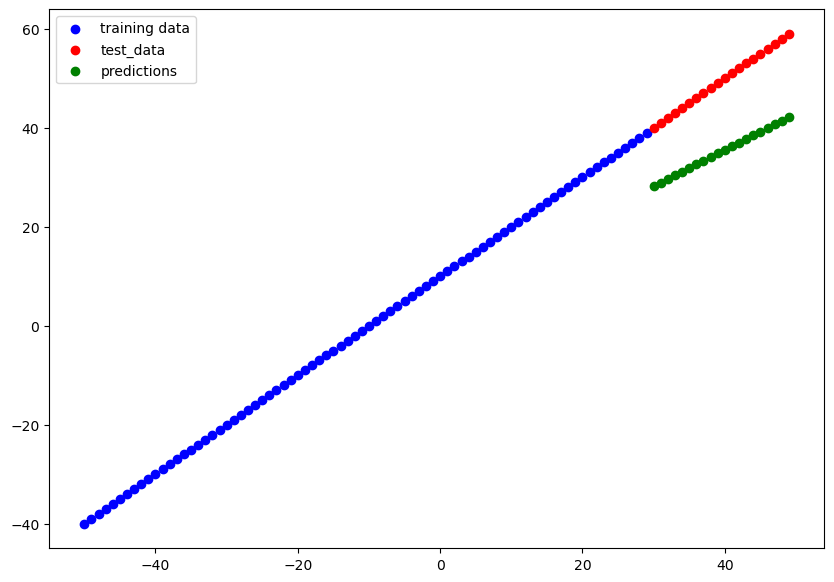

In [18]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(X_train, y_train, X_test, y_test, y_preds_2)

In [19]:
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=14.314917>,
 <tf.Tensor: shape=(), dtype=float32, numpy=207.25452>)

**build `model_3`**

* 2 layers, trainde fro 500 epochs

In [20]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10), 
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae, 
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mae'])

model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
3/3 [==============================] - 1s 7ms/step - loss: 13.4744 - mae: 13.4744
Epoch 2/500
3/3 [==============================] - 0s 7ms/step - loss: 8.9718 - mae: 8.9718
Epoch 3/500
3/3 [==============================] - 0s 8ms/step - loss: 10.3764 - mae: 10.3764
Epoch 4/500
3/3 [==============================] - 0s 11ms/step - loss: 9.3979 - mae: 9.3979
Epoch 5/500
3/3 [==============================] - 0s 18ms/step - loss: 8.3152 - mae: 8.3152
Epoch 6/500
3/3 [==============================] - 0s 5ms/step - loss: 8.0978 - mae: 8.0978
Epoch 7/500
3/3 [==============================] - 0s 6ms/step - loss: 9.9305 - mae: 9.9305
Epoch 8/500
3/3 [==============================] - 0s 6ms/step - loss: 8.7627 - mae: 8.7627
Epoch 9/500
3/3 [==============================] - 0s 5ms/step - loss: 8.0735 - mae: 8.0735
Epoch 10/500
3/3 [==============================] - 0s 8ms/step - loss: 9.0669 - mae: 9.0669
Epoch 11/500
3/3 [==============================] - 0s 9ms/step - loss: 7

1/1 [==============================] - 0s 91ms/step


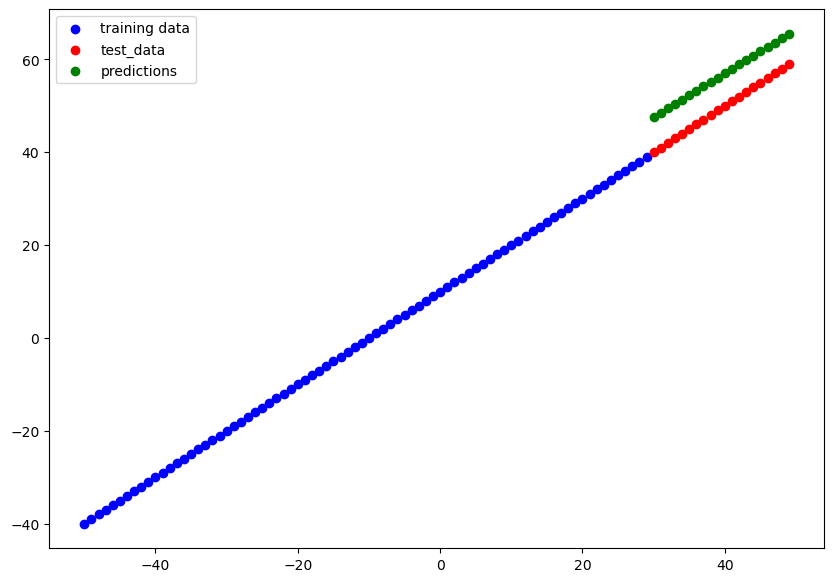

In [21]:
y_preds_3 = model_3.predict(y_test)
plot_predictions(X_train, y_train, X_test, y_test, y_preds_3)


In [22]:
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=7.0392904>,
 <tf.Tensor: shape=(), dtype=float32, numpy=49.651844>)

## comparing the results of our experiments


In [23]:
# let's compare our model's results using a pandas dataframe
import pandas as pd
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()], 
                ["model_2", mae_2.numpy(), mse_2.numpy()], 
                ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,13.179532,174.317902
1,model_2,14.314917,207.254517
2,model_3,7.039290,49.651844


## Tracking your experiments

* TensorBoard - a component of the tensorflow library to help track modelling expreriments
* Weights & Biases - a tool for tracking all of kinds of machine learning experiments

## Saving our model

In [24]:
# save model using the SaveModel format
model_3.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format\assets


INFO:tensorflow:Assets written to: best_model_SavedModel_format\assets


In [25]:
# save model using the HDF5 format
model_3.save("best_model_HDF5_format.h5")

C:\Users\my pc\.conda\envs\p3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Loading in a saved model

In [26]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
# Compare model_2 predictions with SavedModel format model predictions
model_3_preds = model_3.predict(X_test)
loaded_savedmodel_format_preds = loaded_SavedModel_format.predict(X_test)

1/1 [==============================] - 0s 73ms/step


1/1 [==============================] - 0s 285ms/step


In [28]:
loaded_savedmodel_format_preds == model_3_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [29]:
# load in the model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
loaded_h5_model_preds == loaded_savedmodel_format_preds

1/1 [==============================] - 0s 142ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## A Larger Example

In [31]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
insurance = pd.read_csv("insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [33]:
# one-hot encode our dataframe
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [34]:
# Create X & y values (features adn labels)


labels = insurance_one_hot["charges"]
features = insurance_one_hot.drop("charges", axis=1)


In [35]:
print(f'features shape:{features.shape}')
print(f'labels shape:{labels.shape}')

features shape:(1338, 11)
labels shape:(1338,)


In [36]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
len(features), len(X_train), len(X_test)

(1338, 1070, 268)

In [37]:
# build a neural network
tf.random.set_seed(42)
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=['mae'])
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 8643.2129 - mae: 8643.2129
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7869.2339 - mae: 7869.2339
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7595.6099 - mae: 7595.6099
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7701.1211 - mae: 7701.1211
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7674.5610 - mae: 7674.5610
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7656.4946 - mae: 7656.4946
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7587.6460 - mae: 7587.6460
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7693.3306 - mae: 7693.3306
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7537.5435 - mae: 7537.5435
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7731.7524 - mae: 7731.7524

In [39]:
y_preds = model.predict(X_test)
mae = tf.keras.losses.mae(y_test, tf.squeeze(y_preds))
mae

ValueError: in user code:

    File "C:\Users\my pc\.conda\envs\p3\Lib\site-packages\keras\src\engine\training.py", line 2341, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\my pc\.conda\envs\p3\Lib\site-packages\keras\src\engine\training.py", line 2327, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\my pc\.conda\envs\p3\Lib\site-packages\keras\src\engine\training.py", line 2315, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\my pc\.conda\envs\p3\Lib\site-packages\keras\src\engine\training.py", line 2283, in predict_step
        return self(x, training=False)
    File "C:\Users\my pc\.conda\envs\p3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\my pc\.conda\envs\p3\Lib\site-packages\keras\src\engine\input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential' (type Sequential).
    
    Input 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (None, 11)
    
    Call arguments received by layer 'sequential' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 11), dtype=float64)
      • training=False
      • mask=None


## improve our model

In [40]:
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                         metrics=['mae'])

insurance_model_2.fit(X_train,y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13246.7803 - mae: 13246.7803
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 12920.7363 - mae: 12920.7363
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12230.9580 - mae: 12230.9580
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 11117.2627 - mae: 11117.2627
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 9787.5684 - mae: 9787.5684
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 8567.4941 - mae: 8567.4941
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7782.7329 - mae: 7782.7329
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7509.8652 - mae: 7509.8652
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7448.5894 - mae: 7448.5894
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7423.5884 - mae: 7

In [41]:
tf.random.set_seed(42)
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss=tf.keras.losses.mae, 
                         optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
                         metrics=['mae'])
insurance_model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
34/34 [==============================] - 1s 3ms/step - loss: 13307.6230 - mae: 13307.6230
Epoch 2/500
34/34 [==============================] - 0s 2ms/step - loss: 13076.8066 - mae: 13076.8066
Epoch 3/500
34/34 [==============================] - 0s 2ms/step - loss: 12454.5791 - mae: 12454.5791
Epoch 4/500
34/34 [==============================] - 0s 3ms/step - loss: 11357.8584 - mae: 11357.8584
Epoch 5/500
34/34 [==============================] - 0s 2ms/step - loss: 9982.3906 - mae: 9982.3906
Epoch 6/500
34/34 [==============================] - 0s 2ms/step - loss: 8696.2100 - mae: 8696.2100
Epoch 7/500
34/34 [==============================] - 0s 3ms/step - loss: 7829.8110 - mae: 7829.8110
Epoch 8/500
34/34 [==============================] - 0s 3ms/step - loss: 7527.2153 - mae: 7527.2153
Epoch 9/500
34/34 [==============================] - 0s 3ms/step - loss: 7463.0796 - mae: 7463.0796
Epoch 10/500
34/34 [==============================] - 0s 2ms/step - loss: 7438.5176 - mae: 7

In [42]:
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

insurance_model_4.compile(loss=tf.keras.losses.mae, 
                         optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                         metrics=['mae'])

insurance_model_4.fit(X_train, y_train, epochs=150)

Epoch 1/150
34/34 [==============================] - 1s 3ms/step - loss: 10200.9385 - mae: 10200.9385
Epoch 2/150
34/34 [==============================] - 0s 3ms/step - loss: 7396.5171 - mae: 7396.5171
Epoch 3/150
34/34 [==============================] - 0s 3ms/step - loss: 7071.2339 - mae: 7071.2339
Epoch 4/150
34/34 [==============================] - 0s 2ms/step - loss: 6718.1724 - mae: 6718.1724
Epoch 5/150
34/34 [==============================] - 0s 2ms/step - loss: 6451.5537 - mae: 6451.5537
Epoch 6/150
34/34 [==============================] - 0s 3ms/step - loss: 6232.7681 - mae: 6232.7681
Epoch 7/150
34/34 [==============================] - 0s 2ms/step - loss: 5976.3442 - mae: 5976.3442
Epoch 8/150
34/34 [==============================] - 0s 2ms/step - loss: 5684.1709 - mae: 5684.1709
Epoch 9/150
34/34 [==============================] - 0s 3ms/step - loss: 4960.7300 - mae: 4960.7300
Epoch 10/150
34/34 [==============================] - 0s 2ms/step - loss: 4137.7949 - mae: 4137.79

In [43]:
insurance_model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_5.compile(loss=tf.keras.losses.mae, 
                         optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                         metrics=['mae'])

history = insurance_model_5.fit(X_train, y_train, epochs=150)

Epoch 1/150
34/34 [==============================] - 1s 3ms/step - loss: 9344.9297 - mae: 9344.9297
Epoch 2/150
34/34 [==============================] - 0s 3ms/step - loss: 7103.8960 - mae: 7103.8960
Epoch 3/150
34/34 [==============================] - 0s 3ms/step - loss: 6585.5166 - mae: 6585.5166
Epoch 4/150
34/34 [==============================] - 0s 3ms/step - loss: 6275.5151 - mae: 6275.5151
Epoch 5/150
34/34 [==============================] - 0s 3ms/step - loss: 5804.4204 - mae: 5804.4204
Epoch 6/150
34/34 [==============================] - 0s 3ms/step - loss: 4628.9277 - mae: 4628.9277
Epoch 7/150
34/34 [==============================] - 0s 3ms/step - loss: 4065.5869 - mae: 4065.5869
Epoch 8/150
34/34 [==============================] - 0s 3ms/step - loss: 4048.8911 - mae: 4048.8911
Epoch 9/150
34/34 [==============================] - 0s 3ms/step - loss: 3858.0952 - mae: 3858.0952
Epoch 10/150
34/34 [==============================] - 0s 3ms/step - loss: 3878.5542 - mae: 3878.5542

In [44]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 5213.1475 - mae: 5213.1475


[5213.1474609375, 5213.1474609375]

In [45]:
 insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7407.4937 - mae: 7407.4937


[7407.49365234375, 7407.49365234375]

In [46]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3172.2507 - mae: 3172.2507


[3172.250732421875, 3172.250732421875]

In [47]:
insurance_model_4.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3165.4922 - mae: 3165.4922


[3165.4921875, 3165.4921875]

In [48]:
insurance_model_5.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3198.0364 - mae: 3198.0364


[3198.036376953125, 3198.036376953125]

Text(0.5, 0, 'epochs')

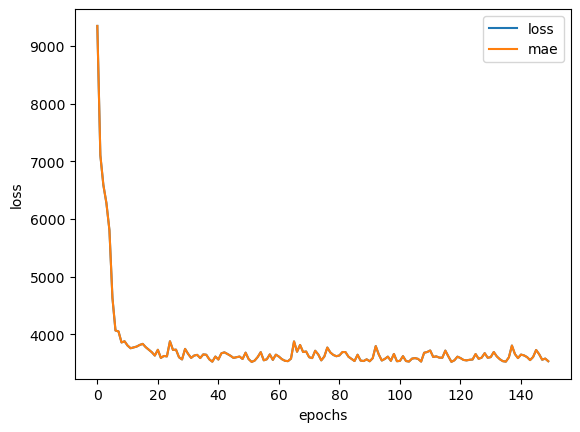

In [49]:
# plot history
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

# Prepocessing data (normalization and standardization)

<Axes: ylabel='Frequency'>

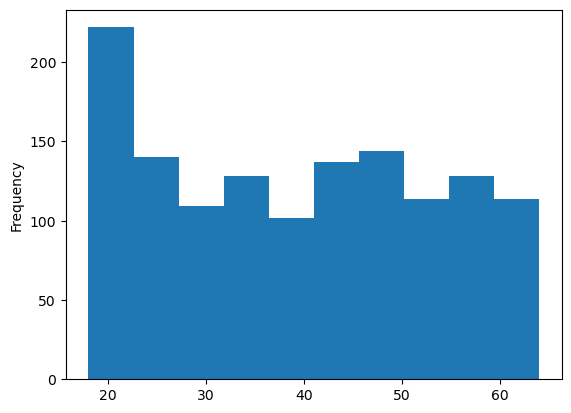

In [52]:
features["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

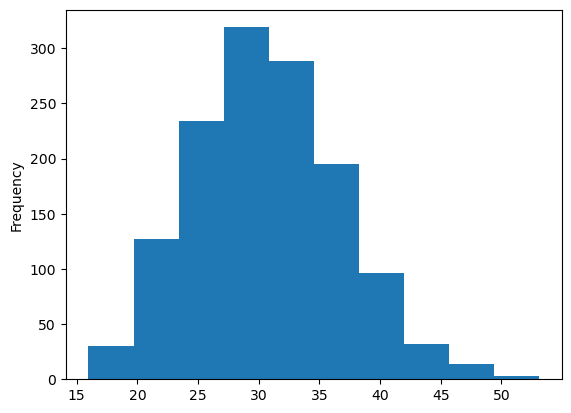

In [53]:
features['bmi'].plot(kind='hist')

## normalization

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

insurance = pd.read_csv("insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [57]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
#create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# create X and y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit the column transformer to our training data
ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [59]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [60]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [64]:
# Build a neural network model
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10), 
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae, 
             optimizer=tf.keras.optimizers.Adam(), 
             metrics=['mae'])

model.fit(X_train_normal, y_train, epochs=150)

Epoch 1/150
34/34 [==============================] - 1s 3ms/step - loss: 13343.5342 - mae: 13343.5342
Epoch 2/150
34/34 [==============================] - 0s 2ms/step - loss: 13334.4678 - mae: 13334.4678
Epoch 3/150
34/34 [==============================] - 0s 3ms/step - loss: 13312.6074 - mae: 13312.6074
Epoch 4/150
34/34 [==============================] - 0s 3ms/step - loss: 13266.9248 - mae: 13266.9248
Epoch 5/150
34/34 [==============================] - 0s 3ms/step - loss: 13185.2568 - mae: 13185.2568
Epoch 6/150
34/34 [==============================] - 0s 3ms/step - loss: 13055.7178 - mae: 13055.7178
Epoch 7/150
34/34 [==============================] - 0s 3ms/step - loss: 12868.1768 - mae: 12868.1768
Epoch 8/150
34/34 [==============================] - 0s 2ms/step - loss: 12612.8672 - mae: 12612.8672
Epoch 9/150
34/34 [==============================] - 0s 3ms/step - loss: 12279.8154 - mae: 12279.8154
Epoch 10/150
34/34 [==============================] - 0s 3ms/step - loss: 11866.58

In [65]:
# evaluate
model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3288.0554 - mae: 3288.0554


[3288.055419921875, 3288.055419921875]